In [1]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os

In [2]:
#all images are stored in the datasets directory
#Chdir to datasets directory
os.chdir(r'../Datasets/')

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [4]:
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,
                                 shear_range=0.3,horizontal_flip=True,
                                 brightness_range=[0.5,1.5])
test_datagen=ImageDataGenerator(rescale=1/255.0)
val_datagen=ImageDataGenerator(rescale=1/255.0)

In [5]:
BATCH_SIZE=32
IMG_SHAPE=(224,224)

In [6]:

train_data=train_datagen.flow_from_directory("maskdata/Train",
                                            target_size=IMG_SHAPE,
                                             batch_size=BATCH_SIZE,class_mode="binary")
test_data=train_datagen.flow_from_directory("maskdata/Test",
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,class_mode="binary")
val_data=train_datagen.flow_from_directory("maskdata/Validation",
                                            target_size=IMG_SHAPE,
                                           batch_size=BATCH_SIZE,class_mode="binary")

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [7]:
train_data.class_indices

{'Mask': 0, 'Non Mask': 1}

In [8]:
image_class_dict={0:"Mask",1:"Non Mask"}

In [9]:
### Ploting Augmented Images
def plot_random_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])

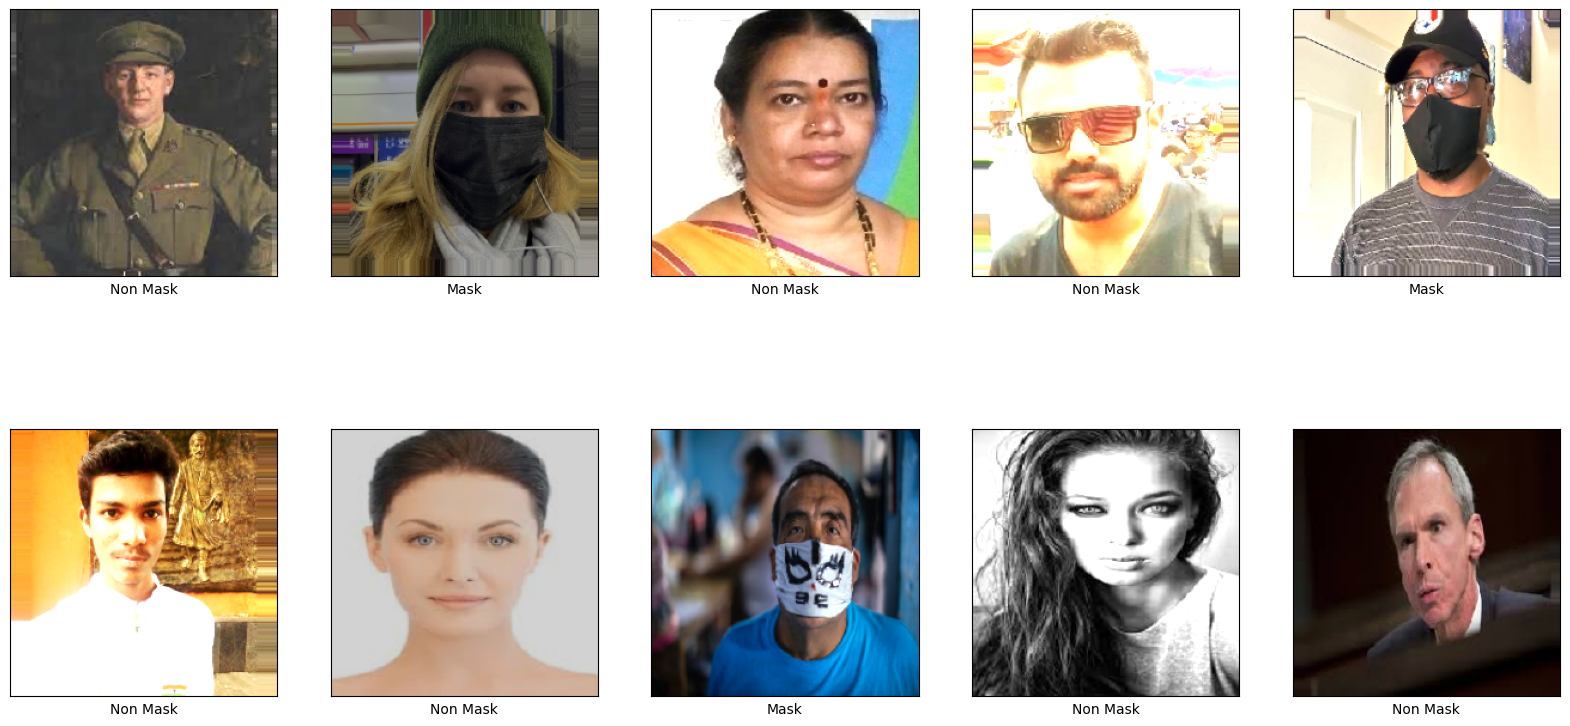

In [10]:
plot_random_images()

### Building Base CNN model

In [11]:
cnn_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [13]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [14]:
history = cnn_model.fit_generator(train_data,epochs=20,
                                  steps_per_epoch=train_data.samples//BATCH_SIZE,
                                  validation_data=val_data,
                                  validation_steps=val_data.samples//BATCH_SIZE)

Epoch 1/20
18/18 [==============================] - 40s 2s/step - loss: 0.8989 - accuracy: 0.6373 - val_loss: 0.4993 - val_accuracy: 0.8229
Epoch 2/20
18/18 [==============================] - 34s 2s/step - loss: 0.3757 - accuracy: 0.8507 - val_loss: 0.3143 - val_accuracy: 0.9062
Epoch 3/20
18/18 [==============================] - 27s 2s/step - loss: 0.2898 - accuracy: 0.9032 - val_loss: 0.3419 - val_accuracy: 0.8681
Epoch 4/20
18/18 [==============================] - 25s 1s/step - loss: 0.2593 - accuracy: 0.8996 - val_loss: 0.3414 - val_accuracy: 0.8785
Epoch 5/20
18/18 [==============================] - 26s 1s/step - loss: 0.2650 - accuracy: 0.8944 - val_loss: 0.3555 - val_accuracy: 0.8611
Epoch 6/20
18/18 [==============================] - 27s 2s/step - loss: 0.2376 - accuracy: 0.9296 - val_loss: 0.2972 - val_accuracy: 0.8958
Epoch 7/20
18/18 [==============================] - 30s 2s/step - loss: 0.1913 - accuracy: 0.9236 - val_loss: 0.2987 - val_accuracy: 0.8958
Epoch 8/20
18/18 [==

In [15]:
cnn_model.evaluate(test_data)

4/4 [==============================] - 4s 989ms/step - loss: 0.2271 - accuracy: 0.8900


[0.22706326842308044, 0.8899999856948853]

Text(0.5, 0, 'Epochs')

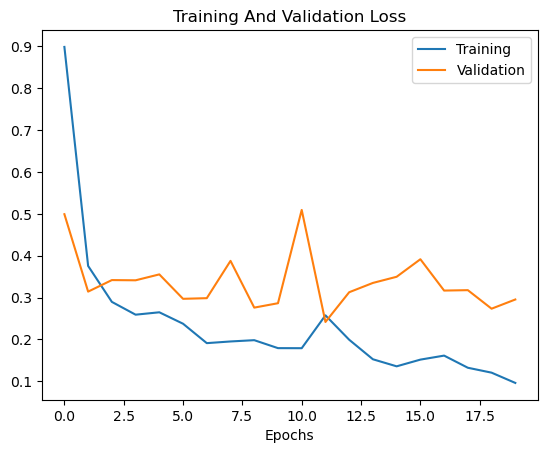

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [17]:
from tensorflow.keras.preprocessing import image

In [18]:
test_image = image.load_img('maskdata/Test/mask/2070.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

1/1 [==============================] - 0s 140ms/step
[0.]


In [19]:
test_image = image.load_img('maskdata/Test/Non Mask/real_01032.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

1/1 [==============================] - 0s 21ms/step
[1.]


In [20]:
test_image = image.load_img('maskdata/Test/Non Mask/real_01040.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

1/1 [==============================] - 0s 36ms/step
[1.]


In [21]:
#Saving the model
tf.keras.models.save_model(cnn_model,'recognize_mask.h5')